<a href="https://colab.research.google.com/github/yerko33/AluraStore_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [18]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [56]:
total_Tienda1 = sum(tienda["Precio"])
total_Tienda2 = sum(tienda2["Precio"])
total_Tienda3 = sum(tienda3["Precio"])
total_Tienda4 = sum(tienda4["Precio"])

print(f"el total de la tienda 1 es: {total_Tienda1}")
print(f"el total de la tienda 2 es: {total_Tienda2}")
print(f"el total de la tienda 3 es: {total_Tienda3}")
print(f"el total de la tienda 4 es: {total_Tienda4}")

el total de la tienda 1 es: 1150880400.0
el total de la tienda 2 es: 1116343500.0
el total de la tienda 3 es: 1098019600.0
el total de la tienda 4 es: 1038375700.0


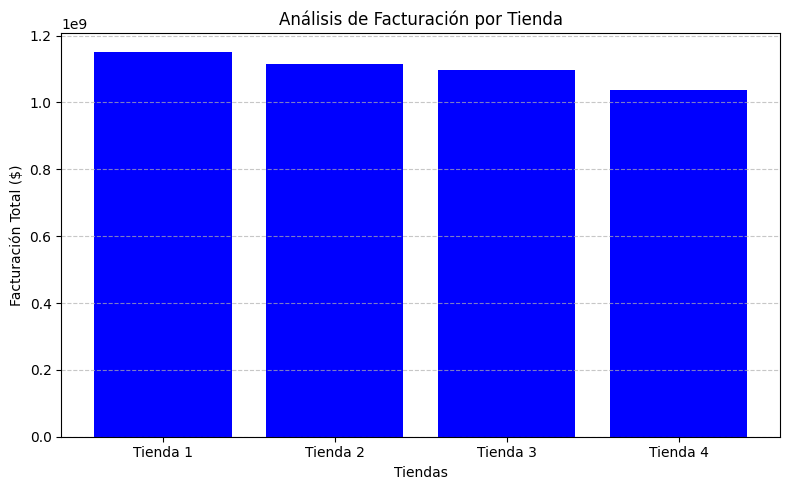

In [57]:
# Crear listas para el gráfico
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_total = [total_Tienda1, total_Tienda2, total_Tienda3, total_Tienda4]

# Crear gráfico de barras
plt.figure(figsize=(8, 5)) #tamaño del grafico en pulgadas
plt.bar(nombres_tiendas, facturacion_total, color='blue')# (etiquetas del eje X, valores que representa cada barra, color de las barras
plt.title("Análisis de Facturación por Tienda") #Titulo del grafico
plt.xlabel("Tiendas") #etiqueta del eje X
plt.ylabel("Facturación Total ($)") #etiqueta eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) #agrega lineas guia
plt.tight_layout() # ajusta el espaciado del grafico
plt.show() #muestra el grafico en pantalla

# 2. Ventas por categoría

In [52]:
# esta funcion cuenta cuantas veces aparece cada categoria de producto
def contar_por_categoria(tienda_1):
    conteo = {}
    try:
        #se almacena en una variable el contenido de la columna Categoria de producto
        categorias = tienda_1["Categoría del Producto"]
        #con un ciclo for se recorre la lista
        for categoria in categorias:
            #se guarda en el diccionario conteo cada categoria
            if categoria in conteo:
                conteo[categoria] += 1
            else:
                conteo[categoria] = 1
    except KeyError as e:
        print("Columna no encontrada:", e)
    return conteo

categorias_tienda1 = contar_por_categoria(tienda)
categorias_tienda2 = contar_por_categoria(tienda2)
categorias_tienda3 = contar_por_categoria(tienda3)
categorias_tienda4 = contar_por_categoria(tienda4)

#Ordeno el diccionario resultado de mayor a menor y selecciona las 3 categorias mas populares
top3_tienda1 = sorted(categorias_tienda1.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda2 = sorted(categorias_tienda2.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda3 = sorted(categorias_tienda3.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda4 = sorted(categorias_tienda4.items(), key=lambda x: x[1], reverse=True)[:3]

#Se imprimen las 3 categorias con mas ventas
print("\nTop 3 categorías más populares en la tienda 1:")
for categoria, cantidad in top3_tienda1:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 2:")
for categoria, cantidad in top3_tienda2:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 3:")
for categoria, cantidad in top3_tienda3:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 4:")
for categoria, cantidad in top3_tienda4:
    print(f"- {categoria}: {cantidad} ventas")


Top 3 categorías más populares en la tienda 1:
- Muebles: 465 ventas
- Electrónicos: 448 ventas
- Juguetes: 324 ventas

Top 3 categorías más populares en la tienda 2:
- Muebles: 442 ventas
- Electrónicos: 422 ventas
- Juguetes: 313 ventas

Top 3 categorías más populares en la tienda 3:
- Muebles: 499 ventas
- Electrónicos: 451 ventas
- Juguetes: 315 ventas

Top 3 categorías más populares en la tienda 4:
- Muebles: 480 ventas
- Electrónicos: 451 ventas
- Juguetes: 338 ventas


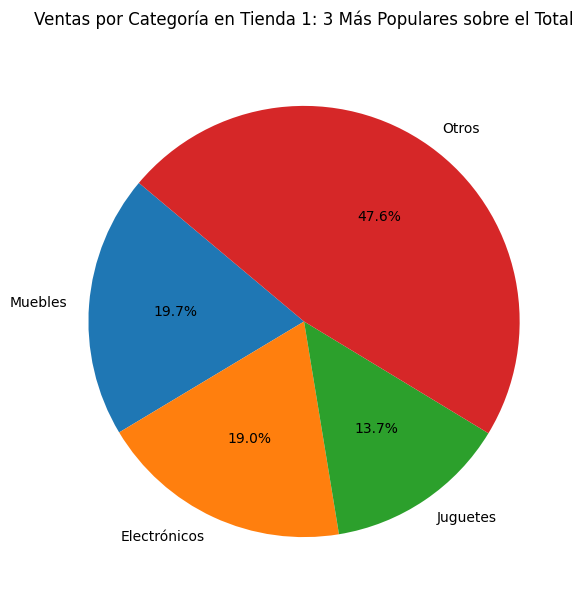

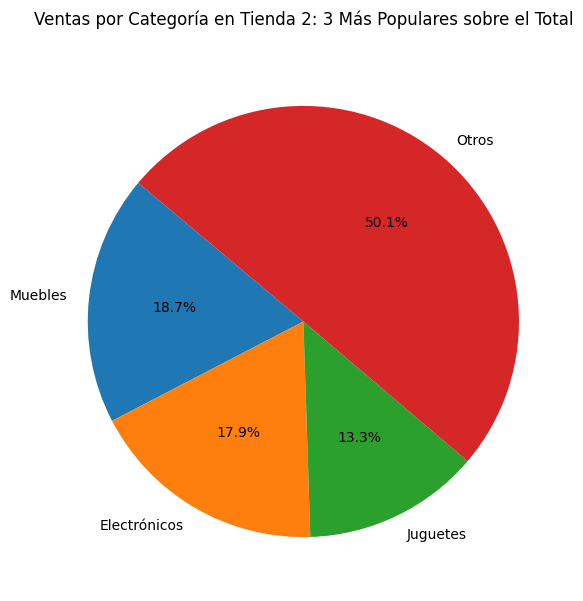

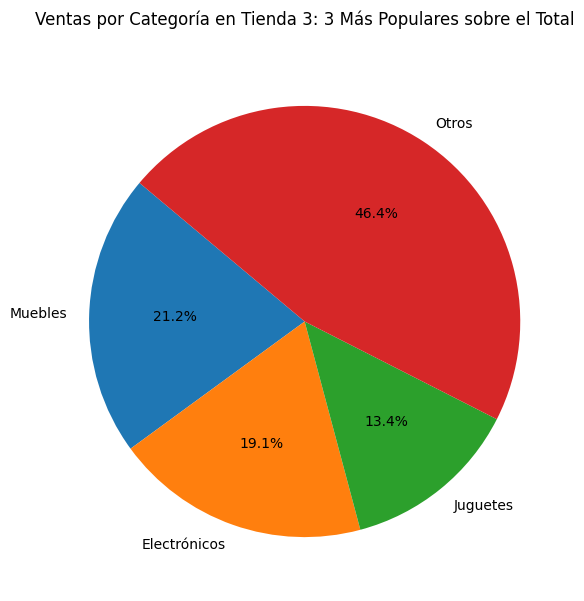

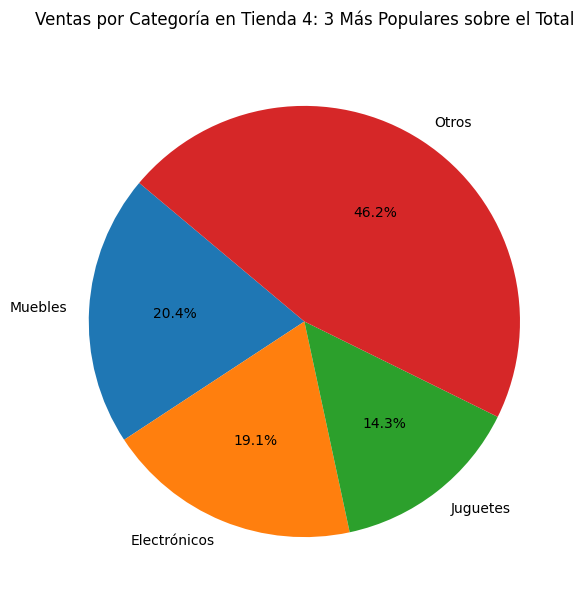

In [59]:
#Creacion de graficos

# Diccionario de productos y ventas por tienda
dic_Tienda1 = categorias_tienda1
dic_Tienda2 = categorias_tienda2
dic_Tienda3 = categorias_tienda3
dic_Tienda4 = categorias_tienda4


# Lista de las tiendas
tiendas = [dic_Tienda1, dic_Tienda2, dic_Tienda3, dic_Tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de torta para cada tienda
for i, tienda_categoria in enumerate(tiendas):
    # Ordenar productos por ventas en orden descendente
    productos_ordenados = sorted(tienda_categoria.items(), key=lambda x: x[1], reverse=True)

    # Obtener los 3 productos más vendidos
    productos_top3 = productos_ordenados[:3]
    ventas_top3 = [venta for _, venta in productos_top3]
    productos_top3_nombres = [producto for producto, _ in productos_top3]

    # Calcular el total de ventas de la tienda
    total_ventas = sum(tienda_categoria.values())

    # Calcular la categoría "Otros" sumando las ventas de los productos restantes
    ventas_otros = total_ventas - sum(ventas_top3)

    # Agregar la categoría "Otros"
    productos_top3_nombres.append('Otros')
    ventas_top3.append(ventas_otros)

    # Crear gráfico de torta
    plt.figure(figsize=(7, 7))
    plt.pie(ventas_top3, labels=productos_top3_nombres, autopct='%1.1f%%', startangle=140)
    plt.title(f"Ventas por Categoría en {nombres_tiendas[i]}: 3 Más Populares sobre el Total", pad=20)
    plt.show()

# 3. Calificación promedio de la tienda


- La calificacion promedio de la tienda 1 es 3.98
- La calificacion promedio de la tienda 2 es 4.04
- La calificacion promedio de la tienda 3 es 4.05
- La calificacion promedio de la tienda 4 es 4.0


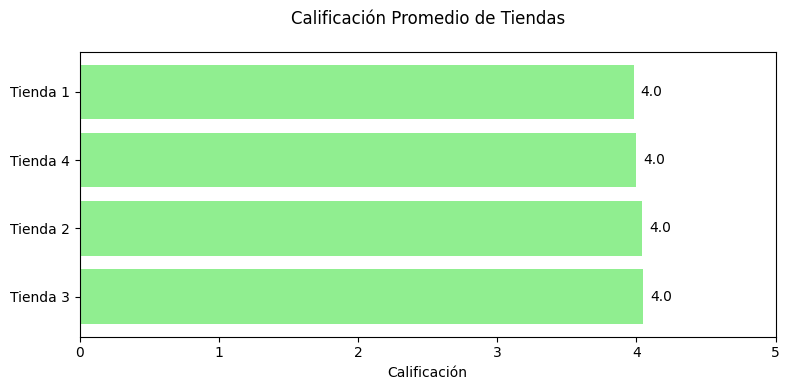

In [60]:
#Calculo de promedio de satisfaccion tienda 1
promedio_tienda = round(tienda["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 1 es {promedio_tienda}")

#Calculo de promedio de satisfaccion tienda 2
promedio_tienda2 = round(tienda2["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 2 es {promedio_tienda2}")

#Calculo de promedio de satisfaccion tienda 3
promedio_tienda3 = round(tienda3["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 3 es {promedio_tienda3}")

#Calculo de promedio de satisfaccion tienda 4
promedio_tienda4 = round(tienda4["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 4 es {promedio_tienda4}")

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios_calificacion = [promedio_tienda, promedio_tienda2, promedio_tienda3, promedio_tienda4]

# Ordenar de mayor a menor
calificaciones_ordenadas, tiendas_ordenadas = zip(*sorted(zip(promedios_calificacion, tiendas), reverse=True))

plt.figure(figsize=(8, 4))
bars = plt.barh(tiendas_ordenadas, calificaciones_ordenadas, color='lightcoral')

# Mostrar valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', fontsize=10)

plt.barh(tiendas_ordenadas, calificaciones_ordenadas, color='lightgreen')
plt.title("Calificación Promedio de Tiendas", pad=20)
plt.xlabel("Calificación")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# esta funcion cuenta cuantas veces aparece cada producto
def contar_por_producto(tienda_1):
    conteo = {}
    try:
        #se almacena en una variable el contenido de la columna Producto
        productos = tienda_1["Producto"]
        #con un ciclo for se recorre la lista
        for producto in productos:
            #se guarda en el diccionario conteo cada producto
            if producto in conteo:
                conteo[producto] += 1
            else:
                conteo[producto] = 1
    except KeyError as e:
        print("Columna no encontrada:", e)
    return conteo

productos_tienda1 = contar_por_producto(tienda)
productos_tienda2 = contar_por_producto(tienda2)
productos_tienda3 = contar_por_producto(tienda3)
productos_tienda4 = contar_por_producto(tienda4)


# Obtener los 5 productos más vendidos tienda 1
productos_mas_vendidos = sorted(productos_tienda1.items(), key=lambda x: x[1], reverse=True)[:5]
print("Los 5 productos más vendidos de la tienda 1:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 1
productos_menos_vendidos = sorted(productos_tienda1.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 1:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 2
productos_mas_vendidos = sorted(productos_tienda2.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 2:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 2
productos_menos_vendidos = sorted(productos_tienda2.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 2:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 3
productos_mas_vendidos = sorted(productos_tienda3.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 3:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 3
productos_menos_vendidos = sorted(productos_tienda3.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 3:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 4
productos_mas_vendidos = sorted(productos_tienda4.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 4:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 4
productos_menos_vendidos = sorted(productos_tienda4.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 4:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

In [ ]:
import matplotlib.pyplot as plt

# Datos de productos más y menos vendidos para cada tienda
productos_mas_vendidos_listas = [
    sorted(productos_tienda1.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda2.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda3.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda4.items(), key=lambda x: x[1], reverse=True)[:5]
]

productos_menos_vendidos_listas = [
    sorted(productos_tienda1.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda2.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda3.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda4.items(), key=lambda x: x[1])[:5]
]

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))  # Crea una matriz de 4 filas x 2 columnas. axes es un array 2D
fig.suptitle("Productos Más y Menos Vendidos por Tienda", fontsize=16) #Se agrega un titulo general

for i in range(4):
    # Más vendidos (columna 0)
    productos_mas = sorted(productos_mas_vendidos_listas[i], key=lambda x: x[1], reverse=True) #Ordena los productos de mayor a menor
    nombres_mas = [p[0] for p in productos_mas]
    cantidades_mas = [p[1] for p in productos_mas]

    axes[i][0].barh(nombres_mas, cantidades_mas, color='green') #Dibuja un grafico de barras horizontales
    axes[i][0].invert_yaxis()  #Pone el producto de mayor cantidad primero
    axes[i][0].set_title(f"{nombres_tiendas[i]} - Más Vendidos") #Agrega el titulo del grafico
    for j, valor in enumerate(cantidades_mas): #Agrega la cantidad como texto en cada barra
        axes[i][0].text(valor, j, str(valor), va='center', ha='left')

    # Menos vendidos (columna 1)
    productos_menos = sorted(productos_menos_vendidos_listas[i], key=lambda x: x[1], reverse=True)  # orden descendente
    nombres_menos = [p[0] for p in productos_menos]
    cantidades_menos = [p[1] for p in productos_menos]

    axes[i][1].barh(nombres_menos, cantidades_menos, color='red')
    axes[i][1].invert_yaxis()
    axes[i][1].set_title(f"{nombres_tiendas[i]} - Menos Vendidos")
    for j, valor in enumerate(cantidades_menos):
        axes[i][1].text(valor, j, str(valor), va='center', ha='left')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Deja espacio para el título
plt.show()


# 5. Envío promedio por tienda

- El costo de envio promedio de la tienda 1 es 26018.61
- El costo de envio promedio de la tienda 2 es 25216.24
- El costo de envio promedio de la tienda 3 es 24805.68
- El costo de envio promedio de la tienda 4 es 23459.46


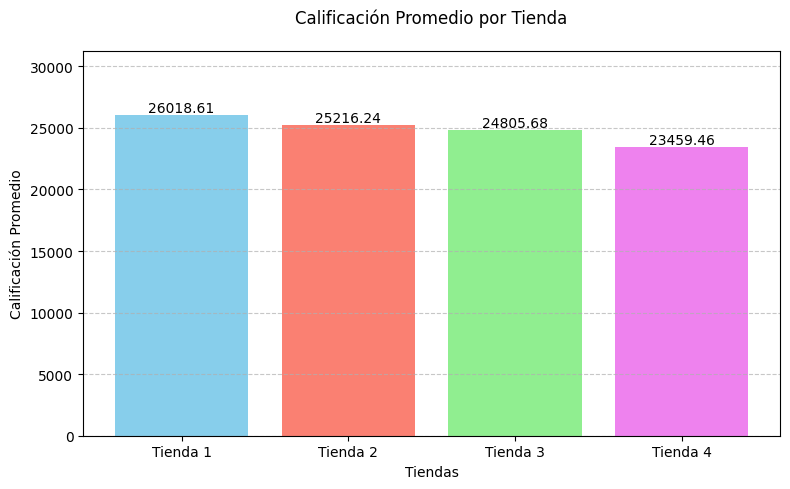

In [61]:
#Calculo de promedio de costo de envio tienda 1
promedio_tienda = round(tienda["Costo de envío"].mean(), 2)
print(f"- El costo de envio promedio de la tienda 1 es {promedio_tienda}")

#Calculo de promedio de costo de envio tienda 2
promedio_tienda2 = round(tienda2["Costo de envío"].mean(), 2)
print(f"- El costo de envio promedio de la tienda 2 es {promedio_tienda2}")

#Calculo de promedio de costo de envio tienda 3
promedio_tienda3 = round(tienda3["Costo de envío"].mean(), 2)
print(f"- El costo de envio promedio de la tienda 3 es {promedio_tienda3}")

#Calculo de promedio de costo de envio tienda 4
promedio_tienda4 = round(tienda4["Costo de envío"].mean(), 2)
print(f"- El costo de envio promedio de la tienda 4 es {promedio_tienda4}")

# Lista de nombres de tiendas y sus promedios
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios_envio = [promedio_tienda, promedio_tienda2, promedio_tienda3, promedio_tienda4]

plt.figure(figsize=(8, 5))
bars = plt.bar(nombres_tiendas, promedios_envio, color=['skyblue', 'salmon', 'lightgreen', 'violet'])

plt.title("Calificación Promedio por Tienda", pad=20)
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
limite_superior = max(promedios_envio) * 1.2  # Aumenta el 20% del valor más alto
plt.ylim(0, limite_superior)  # Ajusta según el máximo de calificación posible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Ventas totales por Año